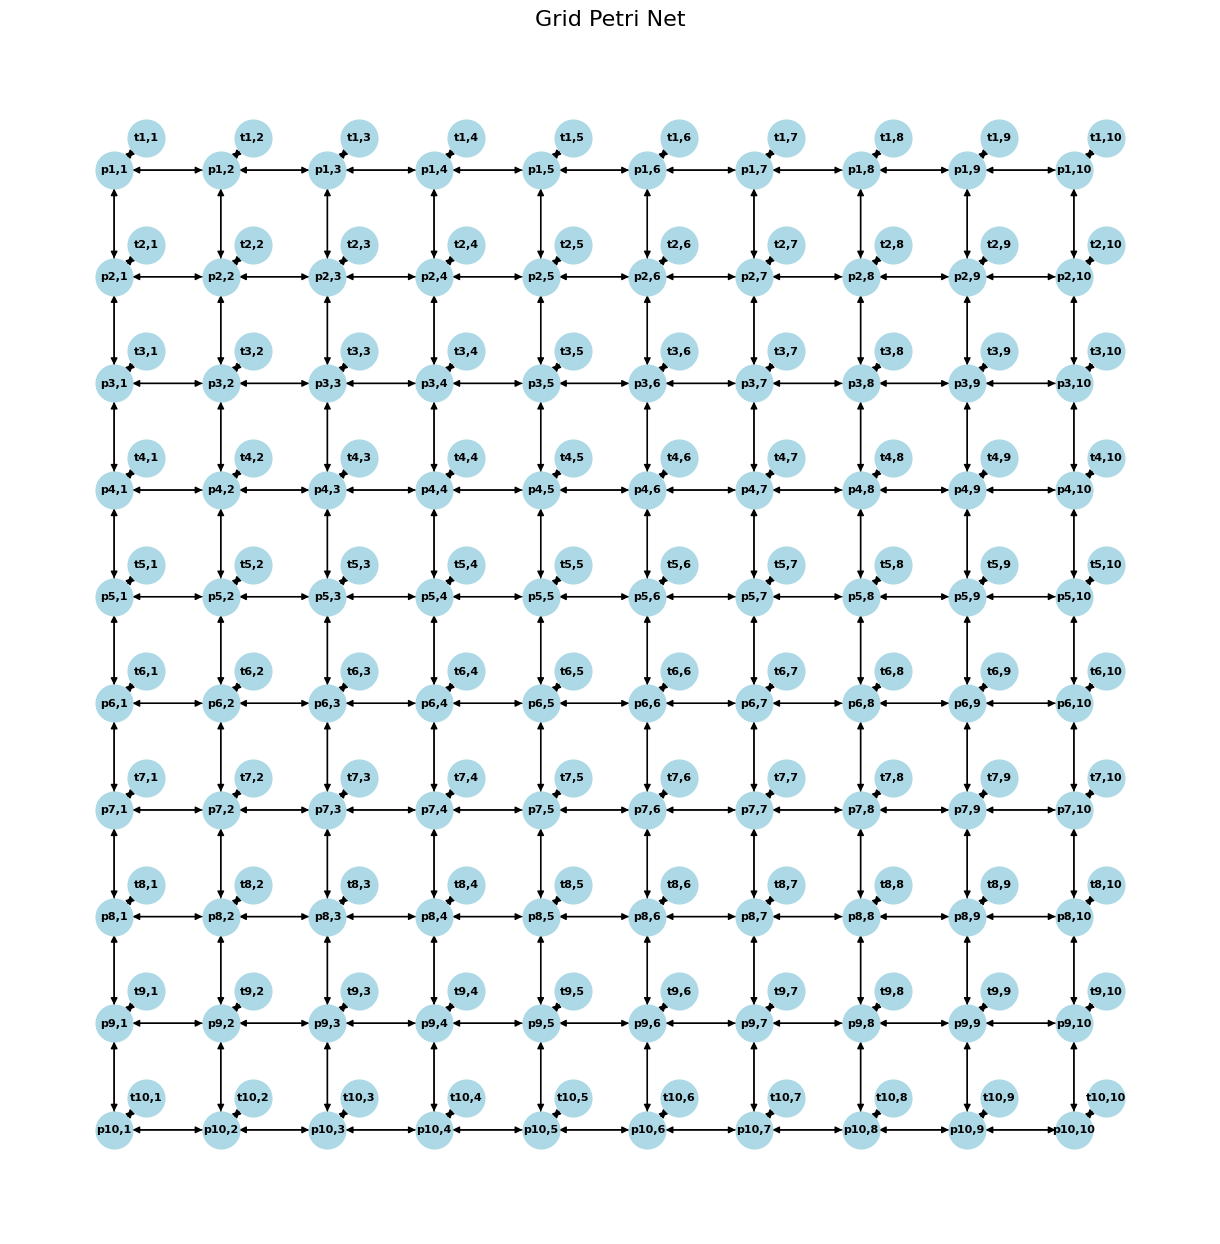

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def create_grid_petri_net(grid_size):
    G = nx.DiGraph()

    places = [[f"p{i},{j}" for j in range(1, grid_size + 1)] for i in range(1, grid_size + 1)]
    transitions = [[f"t{i},{j}" for j in range(1, grid_size + 1)] for i in range(1, grid_size + 1)]

    # Flatten places and transitions
    flat_places = [place for row in places for place in row]
    flat_transitions = [transition for row in transitions for transition in row]

    # Add arcs (edges) to the graph
    for i in range(grid_size):
        for j in range(grid_size):
            # Horizontal connections
            G.add_edge(places[i][j], transitions[i][j])
            G.add_edge(transitions[i][j], places[i][j])

            if j < grid_size - 1:
                G.add_edge(places[i][j], places[i][j + 1])
                G.add_edge(places[i][j + 1], places[i][j])

            # Vertical connections
            if i < grid_size - 1:
                G.add_edge(places[i][j], places[i + 1][j])
                G.add_edge(places[i + 1][j], places[i][j])

    # Define vertex coordinates for grid layout
    vertex_coordinates = {}
    for i in range(grid_size):
        for j in range(grid_size):
            # Place positions
            vertex_coordinates[places[i][j]] = (j, grid_size - i - 1)
            # Transition positions (offset slightly)
            vertex_coordinates[transitions[i][j]] = (j + 0.3, grid_size - i - 1 + 0.3)

    return G, vertex_coordinates

# Parameters
grid_size = 10

# Create the grid Petri net
G, vertex_coordinates = create_grid_petri_net(grid_size)

# Draw the graph
plt.figure(figsize=(12, 12))

nx.draw(
    G,
    pos=vertex_coordinates,
    with_labels=True,
    node_size=700,
    node_color="lightblue",
    font_size=8,
    font_weight="bold"
)

plt.title("Grid Petri Net", fontsize=16)
plt.show()

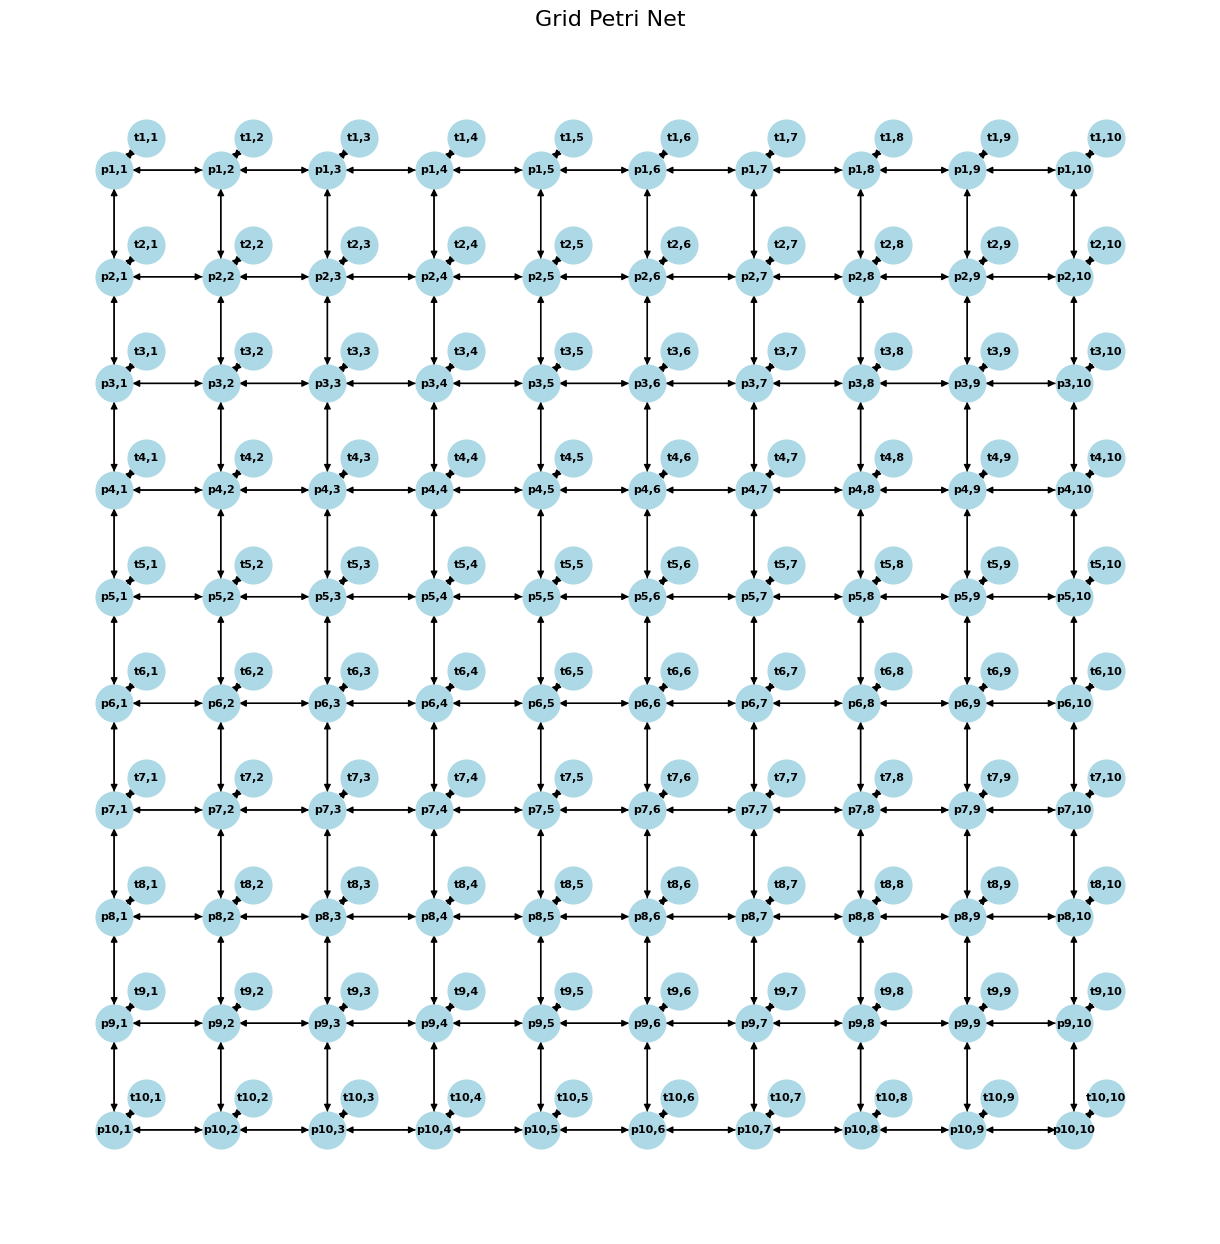

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from functools import reduce

def create_grid_petri_net(grid_size):
    # Generate all places and transitions
    places = [f"p{i},{j}" for i in range(1, grid_size + 1) for j in range(1, grid_size + 1)]
    transitions = [f"t{i},{j}" for i in range(1, grid_size + 1) for j in range(1, grid_size + 1)]

    # Generate arcs using functional programming
    def horizontal_arcs(i, j):
        arcs = [
            (f"p{i},{j}", f"t{i},{j}"),  # Place to Transition
            (f"t{i},{j}", f"p{i},{j}")   # Transition to Place
        ]
        if j < grid_size:
            arcs += [(f"p{i},{j}", f"p{i},{j+1}"), (f"p{i},{j+1}", f"p{i},{j}")]
        return arcs

    def vertical_arcs(i, j):
        arcs = []
        if i < grid_size:
            arcs += [(f"p{i},{j}", f"p{i+1},{j}"), (f"p{i+1},{j}", f"p{i},{j}")]
        return arcs

    arcs = reduce(
        lambda acc, i: acc + reduce(
            lambda acc2, j: acc2 + horizontal_arcs(i, j) + vertical_arcs(i, j),
            range(1, grid_size + 1), []),
        range(1, grid_size + 1), [])

    # Define vertex coordinates for grid layout
    vertex_coordinates = {
        **{f"p{i},{j}": (j, grid_size - i) for i in range(1, grid_size + 1) for j in range(1, grid_size + 1)},
        **{f"t{i},{j}": (j + 0.3, grid_size - i + 0.3) for i in range(1, grid_size + 1) for j in range(1, grid_size + 1)}
    }

    # Create and populate the graph
    G = nx.DiGraph()
    G.add_edges_from(arcs)

    return G, vertex_coordinates

# Parameters
grid_size = 10

# Create the grid Petri net
G, vertex_coordinates = create_grid_petri_net(grid_size)

# Draw the graph
plt.figure(figsize=(12, 12))

nx.draw(
    G,
    pos=vertex_coordinates,
    with_labels=True,
    node_size=700,
    node_color="lightblue",
    font_size=8,
    font_weight="bold"
)

plt.title("Grid Petri Net", fontsize=16)
plt.show()